In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 逻辑回归

## 损失函数
$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}Cost(h_\theta x^{(i)},y^{(i)})$

$Cost(h_\theta(x), y) =\begin{cases}
    -log(h_\theta(x)) & if\ y=1 \\
    -log(1-h_\theta(x)) & if\ y=0
\end{cases}$

引入log是为了形成凸函数（convex）

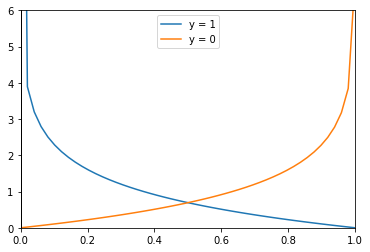

In [104]:
x    = np.linspace(1e-10, 0.999)
log1 = lambda x : -np.log(x)
log2 = lambda x : -np.log(1-x)
plt.plot(x, log1(x), label='y = 1')
plt.plot(x, log2(x), label='y = 0')
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)
plt.axis([0,1,0,6])
plt.legend(loc='upper center')

从图像分析，我们能得到如下结论：

- 当`y = 0`时，如果 $h_\theta x = 0$（语义为y=1的概率为0），cost function也为0，即预测很精确，语义上也是相同的，y=0时y=1的概率当然是0
- 当`y = 0`时，如果 $h_\theta x = 1$（语义为y=1的概率为100%），cost function也为无穷大，即误差无限大，语义上，y=0当然不能与y=1并存

两个等式可以简化为：

$Cost(h_\theta(x),y) = -ylog(h_\theta(x)) - (1-y)log((1-h_\theta(x^{(i)})))$

此即为(Binary) `Cross Entropy Loss`（交叉熵损失）

## 梯度下降

设 $h=g(X\theta)$

$J(\theta) = -\frac{1}{m}\cdot(-y^Tlog(h)-(1-y)^Tlog(1-h))$ 

$\theta_j:=\theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta) \Rightarrow \theta_j:=\theta_j - \frac{\alpha}{m}\sum_{i=i}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$

Looks identical to `linear regression`
- for `linear regression`, $h_\theta(x) = \theta^Tx$
- for `logistical regression`, $h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}}$
- 线性回归里$\theta^Tx$就是损失函数，逻辑回归里，$\theta^Tx$还需要代入到上述log函数里才是损失函数!!!

> 这里为什么损失函数分明不是$h_\theta(x) - y$求导后仍然变成这个形式了呢？课程省略了求导过程而已，但是**千万不要**认为原本就是从这里推出来的，只是**恰好**是这个形态而已，这就是数学之美吧。
>
> 自己手推一下，就是一个很简单的log'(g(x))的链式求导而已，然后也很容易推出g'(x) = g(x) * (1 - g(x))

矩阵求导的链式法则：
$z = f(Y),\ Y = AX+B \Rightarrow 
\frac{\partial z}{\partial X} = A^T\frac{\partial z}{\partial Y}$
即先对四则运算进行求导，然后再根据矩阵在x左边还是右边来左乘或右乘$A^T$

所以：
$\theta := \theta - \frac{\alpha}{m}X^T(g(X\theta) - \vec{y})$

> 解释：
> 1. cost function是那一串log相减，最外层求导后就是$h(x)-y$
> 2. 而$h(x) = g(X\theta)$，应用链式法，内层就是$X\theta$对$\theta$继续求导，结果是把$X^T$乘到左边去

In [55]:
# traning data

X = np.array([
    (0.5, 0.5), 
    (0.5, 1.0),
    (0.5, 1.5), 
    (0.8, 2.0), 
    (0.6, 1.2), 
    (0.9, 1.3), 
    (1.2, 0.9), 
    (1.5, 0.5) , 
    (1.1, 2.9), 
    (1.5, 3.0), 
    (1.6, 2.5), 
    (1.8, 2.0), 
    (1.9, 3.1), 
    (2.3, 2.8), 
    (2.3, 1.6), 
    (2.9, 1.5)
], np.float32)

label = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]], np.float32).T

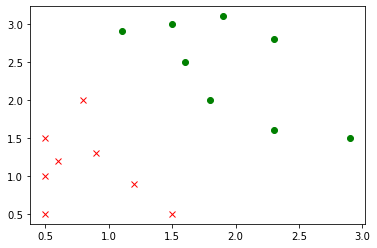

In [40]:
# bool indexing
positive = X[label[:, 0] == 1]
negative = X[label[:, 0] == 0]

plt.plot(positive[:, 0], positive[:, 1], "go")
plt.plot(negative[:, 0], negative[:, 1], "rx")

array([[-2.86203361],
       [ 1.1745149 ],
       [ 0.92932254]])

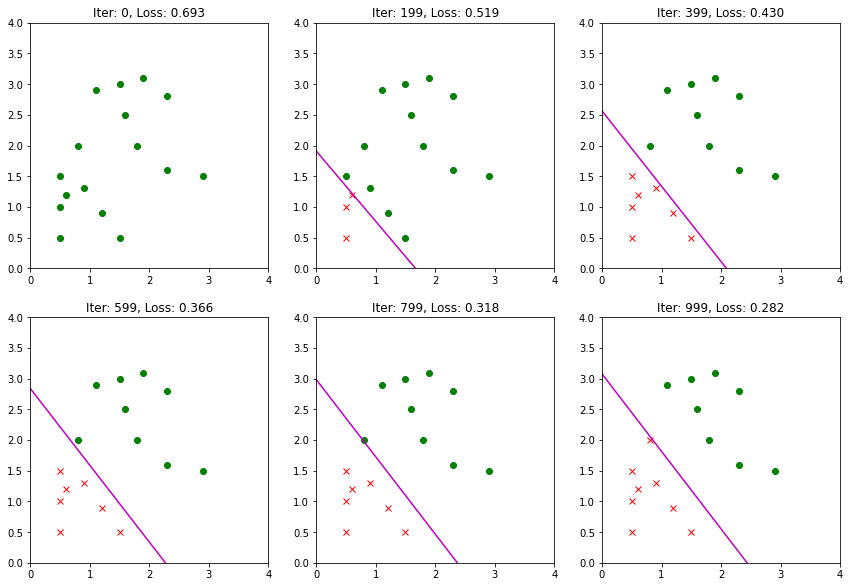

In [115]:
def logreg(X, y):
    # ======vars======
    m      = X.shape[0]
    n      = X.shape[1] + 1   # with bias column
    X      = np.insert(X, 0, values=1, axis=1)
    theta  = np.zeros((n, 1))
    a      = 0.03
    loop   = 1000
    
    # ====functions====
    x𝜃     = lambda 𝜃: X @ 𝜃                  # x * theta
    h𝜃     = lambda z: 1 / (1 + np.exp(-z))   # sigmoid function
    j𝜃     = lambda h: -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) / m  #CEL
    
    # ======plot======
    fig, axs = plt.subplots(nrows=2, ncols=3)
    fig.subplots_adjust(hspace=.2, wspace=.2, top=2, right=2)
    axes = axs.flatten()
    ctr  = 0

    # ===gradient descent=====
    for i in range(loop):
        predict = h𝜃(x𝜃(theta))
        loss    = j𝜃(predict)   # CEL, for log
        dh      = predict - y   # derivative of h
        d𝜃      = X.T @ dh      # chain rule (derivative of 𝜃)
        theta  -= a / m * d𝜃
        
        # ======plot======
        if (i+1) % (loop//5) == 0 or i == 0:
            ax       = axes[ctr]; ctr+=1
            prob     = h𝜃(x𝜃(theta))
            positive = X[:,1:][prob[:, 0] >= 0.5]
            negative = X[:,1:][prob[:, 0] <  0.5]
            
            ax.set_title(f"Iter: {i}, Loss: {loss:.3f}")
            ax.axis([0, 4, 0, 4])
            ax.plot(positive[:, 0], positive[:, 1], "go")
            ax.plot(negative[:, 0], negative[:, 1], "rx")
        
            # 𝚹·x = 0 is the decision boundary
            # 𝚹0 + 𝚹1·x1 + 𝚹2·x2 = 0
            # we plot use x1 as x, x2 as y, so:
            # y = -(𝚹0 + 𝚹1·x1) / 𝚹2
            tx = np.array([0, 5])
            ty = -(theta[0] + theta[1] * tx) / theta[2]
            ax.plot(tx, ty, 'm')
        
    return theta

logreg(X, label)